In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
df = pd.read_csv("C:/Users/Wajih/Desktop/Projects Wajih/Loan Approval Classification/loan_data.csv")
print(df.head())

   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

In [35]:
df.shape

(45000, 14)

In [36]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [37]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

Our columns are imported with successs and do not need any conversion or null values treatment

data visualization

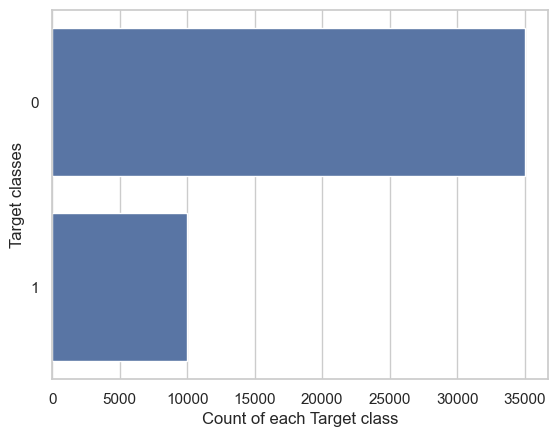

In [38]:
import seaborn as sns 
sns.countplot(y=df.loan_status ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

We have imbalanced data here. we will implement our model and then we see

C:\Users\Wajih\AppData\Local\Temp\ipykernel_3232\3705025441.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='magma')
C:\Users\Wajih\AppData\Local\Temp\ipykernel_3232\3705025441.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='magma')
C:\Users\Wajih\AppData\Local\Temp\ipykernel_3232\3705025441.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='magma')
C:\Users\Waji

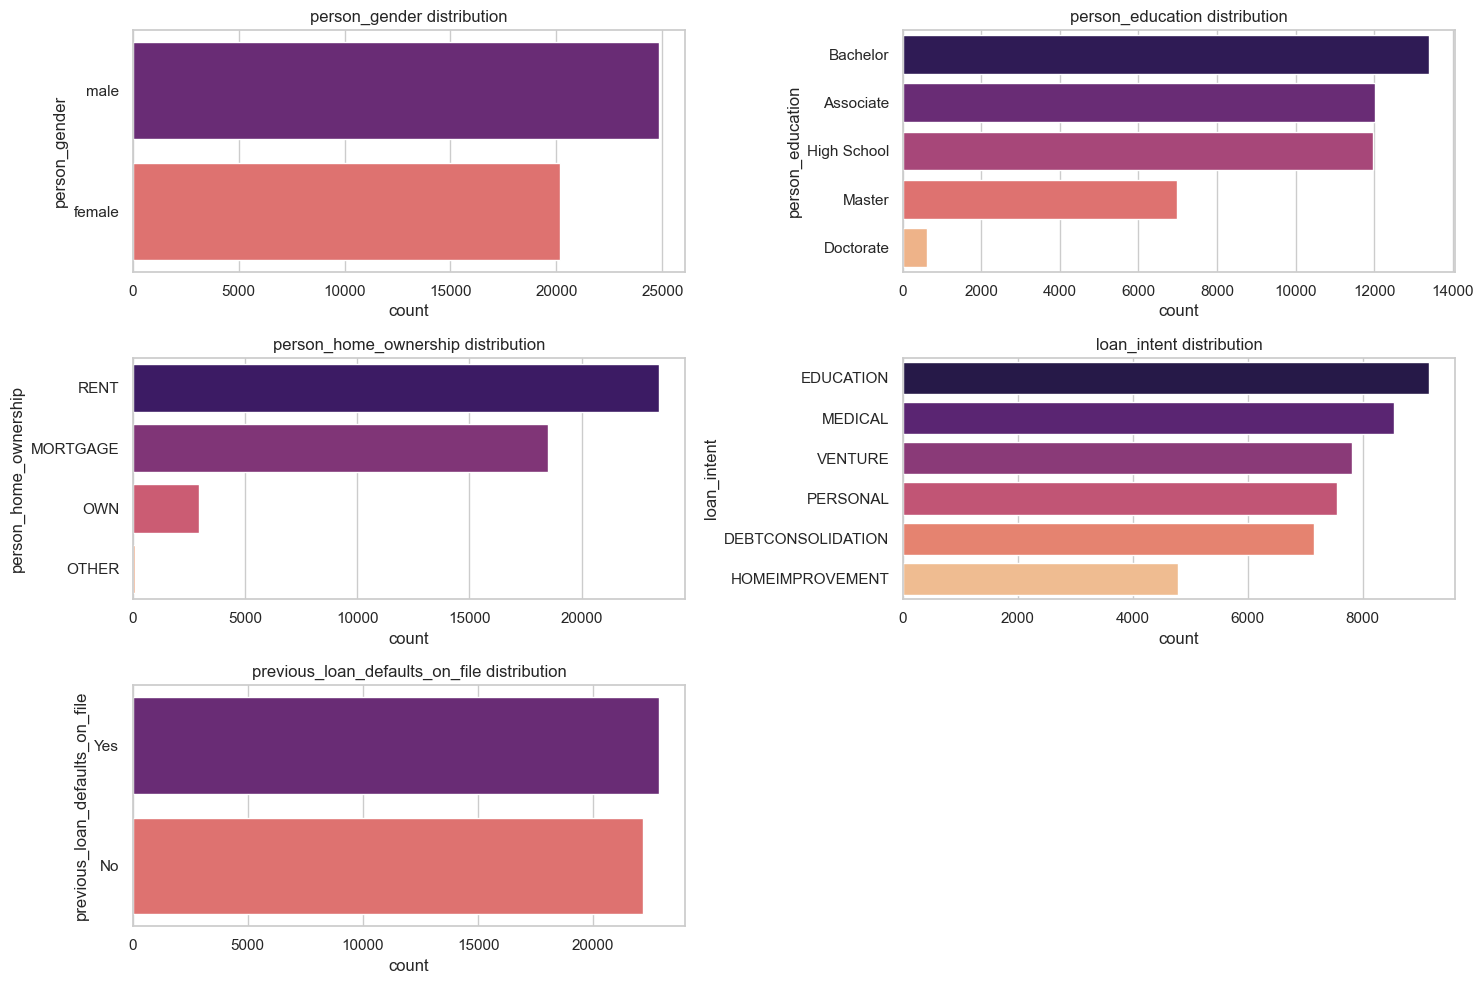

In [39]:
import seaborn as sns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_distribution = {col: df[col].value_counts() for col in categorical_cols}

# Visualization of categorical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='magma')
    plt.title(f"{col} distribution")
    plt.tight_layout()
plt.show()

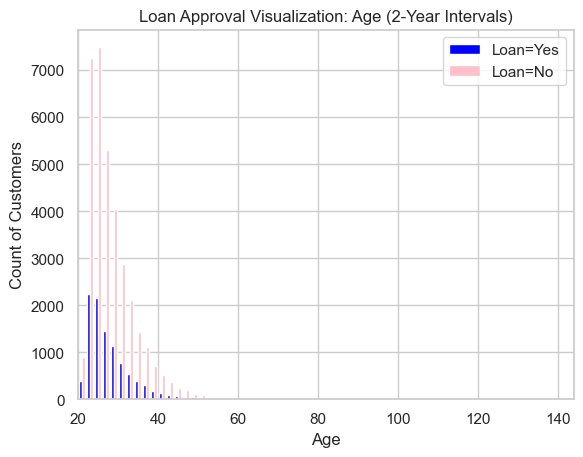

In [40]:
loan_status_yes = df[df["loan_status"]==1].person_age

loan_status_no = df[df["loan_status"]==0].person_age


# Convert age_min and age_max to integers
age_min = int(df["person_age"].min())
age_max = int(df["person_age"].max())

# Calculate the bin edges for 2-year intervals
bin_edges = range(age_min, age_max + 2, 2)  # +2 to include the max age in the final bin

# Plot the histogram with 2-year intervals
plt.hist([loan_status_yes, loan_status_no], bins=bin_edges, color=['blue', 'pink'], label=['Loan=Yes', 'Loan=No'])
plt.xlabel("Age")
plt.ylabel("Count of Customers")
plt.title("Loan Approval Visualization: Age (2-Year Intervals)")
plt.legend()

# Set x-axis limits to ensure it spans the entire age range
plt.xlim(age_min, age_max)

plt.show()



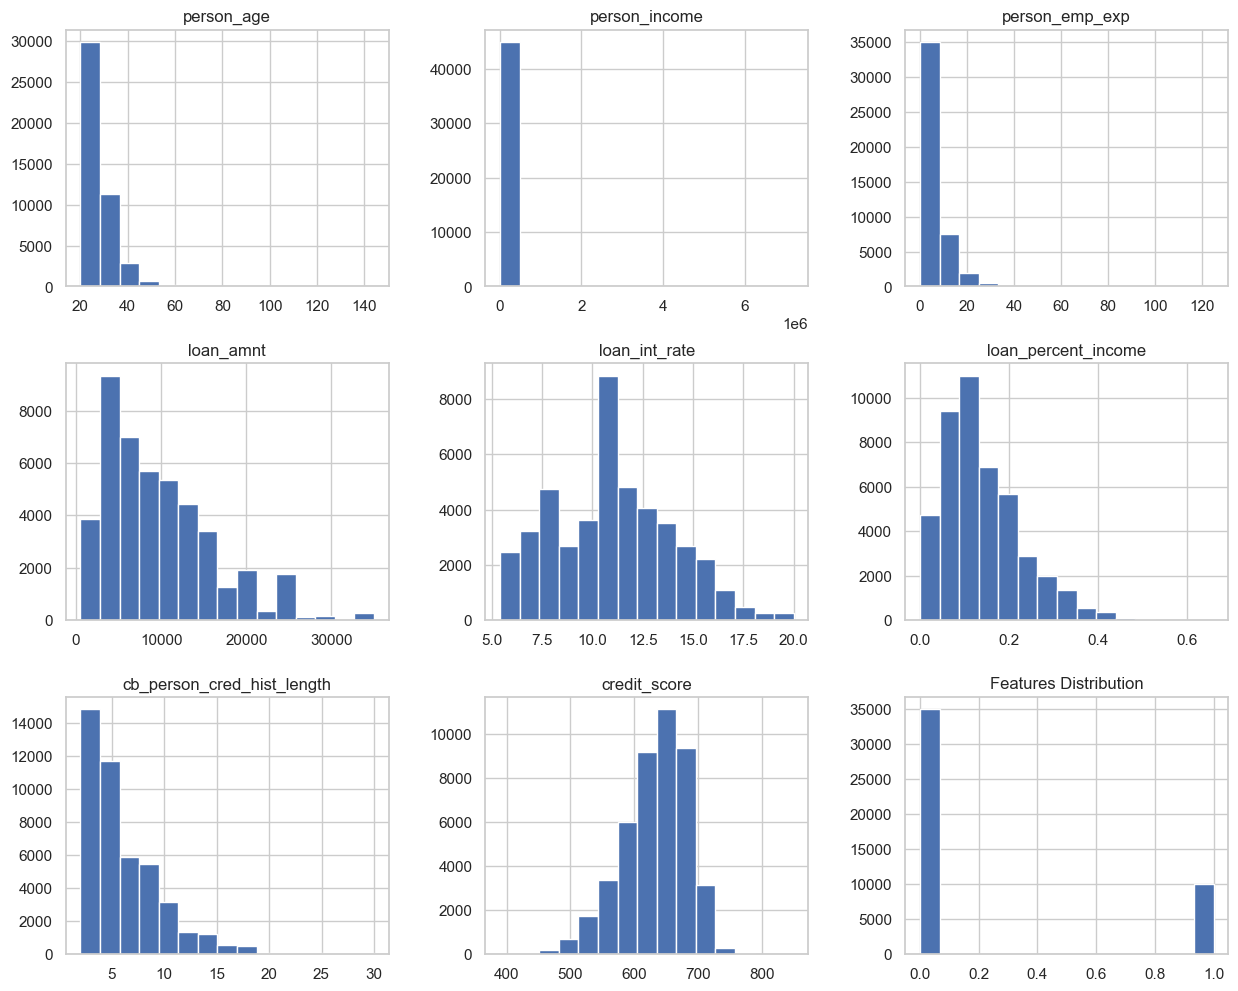

In [41]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

We have to change categorical variables into numeric

In [42]:
# a function to print the unique values for only textual(categorical) columns in the dataframe
def LabelObjectColumns(df1):
    for col in df1:
        #Checks if the data type of the column (df1[col].dtypes) is 'object', which in pandas typically represents text or mixed data.
        if df1[col].dtypes=='object':
            print(col,df1[col].unique())

In [43]:
LabelObjectColumns(df)

person_gender ['female' 'male']
person_education ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
person_home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
previous_loan_defaults_on_file ['No' 'Yes']


In [44]:
df['previous_loan_defaults_on_file'].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\Wajih\AppData\Local\Temp\ipykernel_3232\3453756225.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['previous_loan_defaults_on_file'].replace({'Yes': 1,'No': 0},inplace=True)
C:\Users\Wajih\AppData\Local\Temp\ipykernel_3232\3453756225.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [45]:
LabelObjectColumns(df)

person_gender ['female' 'male']
person_education ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
person_home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


In [46]:
df['person_gender'].replace({'female': 0,'male': 1},inplace=True)

C:\Users\Wajih\AppData\Local\Temp\ipykernel_3232\62583277.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_gender'].replace({'female': 0,'male': 1},inplace=True)
C:\Users\Wajih\AppData\Local\Temp\ipykernel_3232\62583277.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['person_gen

In [47]:
LabelObjectColumns(df)

person_education ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
person_home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


One Hot encoding for the other categorical variables since they contain multiple values

In [48]:
# this will create for each unique value a new column that is a dummy variable (dtype=int as we want to show 0 or 1;if not written, it will be boolean)
df1 = pd.get_dummies(data=df,dtype=int, columns=['person_education','loan_intent','person_home_ownership'])
print(LabelObjectColumns(df1))

None


In [49]:
df1.shape

(45000, 26)

In [50]:
df1.describe()


,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
count,45000.000000,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,...,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,0.552022,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.507956,...,0.158778,0.203400,0.106289,0.189956,0.167822,0.173756,0.410867,0.002600,0.065578,0.520956
std,6.045108,0.497292,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.499942,...,0.365473,0.402532,0.308210,0.392270,0.373712,0.378903,0.491997,0.050924,0.247545,0.499566
min,20.000000,0.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,1.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,30.000000,1.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,144.000000,1.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


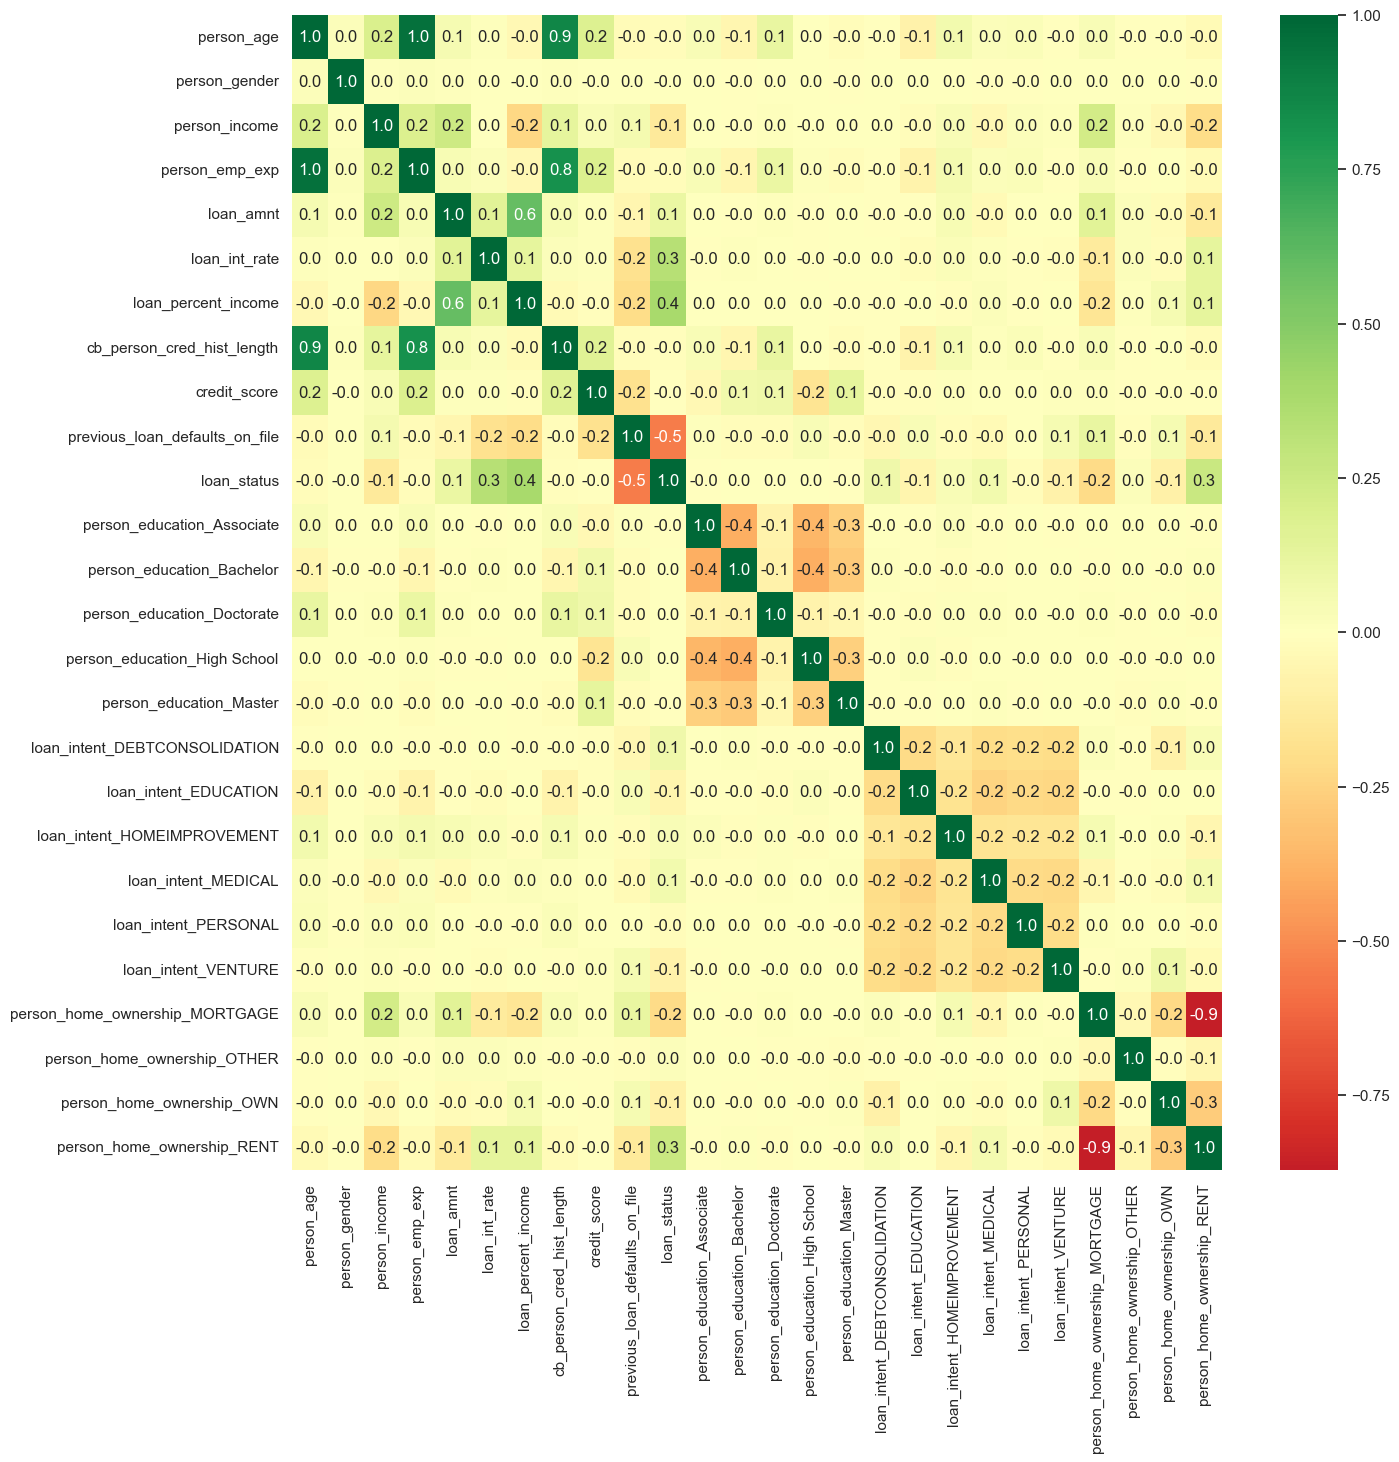

In [53]:
plt.figure(figsize=(15,15))
p = sns.heatmap(df1.corr(), annot=True, cmap='RdYlGn', center=0, fmt=".1f")
plt.show()


All of our variables became numerical and ready to be used in our ANN model

We have to scale our numerical variables that are not between one and zero

In [56]:
# since there are variables that are binary and variables that have a higher range, we have to do scaling for our variables
# scaling is important before doing an deep learning
cols_to_scale = list(df1.columns)

# imports the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Creates an instance of the MinMaxScaler class named scaler.
scaler = MinMaxScaler()
# fit_transform: 1 -fit creates the min and max that will be used as scaling parameters / 2- transform scales the data based on the parameters
df2 = df1.copy()
df2[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [57]:
df2.describe()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,...,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,0.062614,0.552022,0.010054,0.043283,0.263280,0.383169,0.211704,0.138125,0.527410,0.507956,...,0.158778,0.203400,0.106289,0.189956,0.167822,0.173756,0.410867,0.002600,0.065578,0.520956
std,0.048751,0.497292,0.011181,0.048508,0.183040,0.204308,0.132140,0.138561,0.109643,0.499942,...,0.365473,0.402532,0.308210,0.392270,0.373712,0.378903,0.491997,0.050924,0.247545,0.499566
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.032258,0.000000,0.005450,0.008000,0.130435,0.217421,0.106061,0.035714,0.458696,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.048387,1.000000,0.008209,0.032000,0.217391,0.383402,0.181818,0.071429,0.543478,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.080645,1.000000,0.012205,0.064000,0.340210,0.519204,0.287879,0.214286,0.608696,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All of our variables are scaled: we should split our dataset now

In [58]:
# fixing the training and test datasets
X = df2.drop('loan_status',axis='columns')
y = df2['loan_status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [60]:
X_train.shape

(36000, 25)

In [69]:
import tensorflow as tf
from tensorflow import keras
# keras.Sequential: Creates a sequential model where layers are stacked one after the other.
# keras.layers.Dense: Defines a fully connected (dense) layer
# input_shape=(26,): Specifies the input shape (a vector of size 26)
# activation='relu': Applies the ReLU (Rectified Linear Unit) activation function, which outputs max(0, x): most used in hidden layers
# second layer dense layer with 15 neurons and the ReLU activation function
# activation='sigmoid': Outputs values between 0 and 1, making it suitable for binary classification.
# output layer with only one neuron as we have 1 value for output (between 0 and one)

# IMPORTANT: in Keras, the input layer is often implicit and integrated into the first layer when you define the input_shape parameter
# If your dataset has 26 features, the input shape is the same (the other "26" is the number of neurons in the first layer(which can be different that 26)).
model = keras.Sequential([
    keras.layers.Dense(40, kernel_initializer = 'uniform', input_shape=(25,), activation='relu'),
    keras.layers.Dense(15,kernel_initializer = 'uniform', activation='relu'),
    keras.layers.Dense(1, kernel_initializer = 'uniform',activation='sigmoid')
])

# model.compile: connects the model to the specified optimizer,loss function and metrics and prepares how the model will calculate loss and update weight during the fitting part

# Adam optimizer, which adjusts learning rates dynamically during training
# loss='binary_crossentropy': loss function for binary classification problems.
# accuracy: tracks accuraty as a metric for training and evaluation
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50,verbose = 1)


Epoch 1/50


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8332 - loss: 0.3906
Epoch 2/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8914 - loss: 0.2279
Epoch 3/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8956 - loss: 0.2243
Epoch 4/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8943 - loss: 0.2219
Epoch 5/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9001 - loss: 0.2177
Epoch 6/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8996 - loss: 0.2163
Epoch 7/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8980 - loss: 0.2210
Epoch 8/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8997 - loss: 0.2165
Epoch 9/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8998 - loss: 0.2155
Epoch 10/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9010 - loss: 0.2142
Epoch 11/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8990 - loss: 0.2167
Epoch 12/50
1125/1125 ━━━━━━━━━━━━━━━━━━━

In [70]:
# first value: loss ; second value: accuracy
# The model makes predictions on the test data (X_test) and compares them with the true labels (y_test)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9163 - loss: 0.1814
Test Loss: 0.179773211479187, Test Accuracy: 0.9161111116409302


In [71]:
# predicting using the test data and choosing as 1 values higher than threshold (in my case 0.5)
yp = model.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [72]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      6964
         1.0       0.86      0.75      0.80      2036

    accuracy                           0.92      9000
   macro avg       0.89      0.86      0.87      9000
weighted avg       0.91      0.92      0.91      9000



we will evaluate our model using The Receiver Operating Characteristic (ROC) curve which is a graphical representation of the performance of a binary classification model, showing the trade-offs between the True Positive Rate (TPR) and False Positive Rate (FPR)

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step


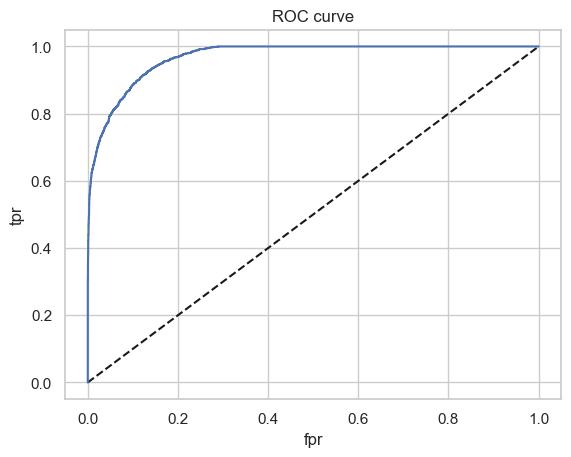

In [75]:
from sklearn.metrics import roc_curve
#This line is generating the predicted probabilities (y_pred_proba) for the test dataset (X_test).
y_pred_proba = model.predict(X_test)  # For binary classification
#roc_curve function from sklearn.metrics is used to compute the false positive rate (fpr), true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
#adds a diagonal line (a random classifier) which represents a model that performs no better than random guessing. The 'k--' specifies a black dashed line.
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [76]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9689437059973888

In order to check if there is overfitting: we will use cross-validation.
What happens: 
1- the dataset is split into 10 equal parts (folds). Each part is used as a test set once, while the other 9 parts are used as the training set.
2-For each of the 10 folds:
Training: The model is trained on 9 out of the 10 folds. This means 90% of the data is used to train the model in each iteration.
Testing: The model is then tested on the 1 remaining fold (the fold that was not part of the training data). This is the validation set for this iteration.
This process repeats for all 10 folds, so each fold gets a chance to be used for testing.

In [79]:
# Evaluating the ANN
# A wrapper that allows you to use a Keras model with Scikit-learn functions like cross_val_score
from scikeras.wrappers import KerasClassifier
#Function from Scikit-learn that evaluates a model using cross-validation.
#It divides the data into k parts (folds), trains the model k times (on different training sets), and computes evaluation metrics.
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 40, kernel_initializer = 'uniform', activation = 'relu', input_dim = 25))
    classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 50,verbose=1)
#cross_val_score: This function evaluates the model with 10-fold cross-validation. it gives an array that contains accuracies for each training done (coié 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean = accuracies.mean()
variance = accuracies.std()

Epoch 1/50


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8499 - loss: 0.3305
Epoch 2/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8953 - loss: 0.2242
Epoch 3/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9002 - loss: 0.2193
Epoch 4/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9001 - loss: 0.2190
Epoch 5/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8995 - loss: 0.2145
Epoch 6/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9044 - loss: 0.2117
Epoch 7/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9036 - loss: 0.2119
Epoch 8/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9036 - loss: 0.2109
Epoch 9/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9035 - loss: 0.2099
Epoch 10/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9059 - loss: 0.2078
Epoch 11/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9093 - loss: 0.2007
Epoch 12/50
3240/3240 ━━━━━━━━━━━━━━━━━━━

c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3240/3240 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8515 - loss: 0.3259
Epoch 2/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8922 - loss: 0.2277
Epoch 3/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8967 - loss: 0.2248
Epoch 4/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8973 - loss: 0.2201
Epoch 5/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9029 - loss: 0.2154
Epoch 6/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9022 - loss: 0.2144
Epoch 7/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8996 - loss: 0.2180
Epoch 8/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9041 - loss: 0.2104
Epoch 9/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9016 - loss: 0.2147
Epoch 10/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9048 - loss: 0.2072
Epoch 11/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9069 - loss: 0.2043
Epoch 12/50
3240/3240 ━━━━━━━━━━━━━━━━━━━

c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8506 - loss: 0.3291
Epoch 2/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8970 - loss: 0.2223
Epoch 3/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8969 - loss: 0.2215
Epoch 4/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8971 - loss: 0.2178
Epoch 5/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9018 - loss: 0.2130
Epoch 6/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9038 - loss: 0.2114
Epoch 7/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9047 - loss: 0.2092
Epoch 8/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9066 - loss: 0.2042
Epoch 9/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9073 - loss: 0.2043
Epoch 10/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9092 - loss: 0.2022
Epoch 11/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9103 - loss: 0.1983
Epoch 12/50
3240/3240 ━━━━━━━━━━━━━━━━━━━

c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8476 - loss: 0.3322
Epoch 2/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8973 - loss: 0.2221
Epoch 3/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8959 - loss: 0.2230
Epoch 4/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9000 - loss: 0.2187
Epoch 5/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9013 - loss: 0.2154
Epoch 6/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9010 - loss: 0.2142
Epoch 7/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9049 - loss: 0.2146
Epoch 8/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8991 - loss: 0.2188
Epoch 9/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9051 - loss: 0.2089
Epoch 10/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9046 - loss: 0.2077
Epoch 11/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9109 - loss: 0.1953
Epoch 12/50
3240/3240 ━━━━━━━━━━━━━━━━━━━

c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8527 - loss: 0.3241
Epoch 2/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8940 - loss: 0.2241
Epoch 3/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8963 - loss: 0.2222
Epoch 4/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9027 - loss: 0.2163
Epoch 5/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8971 - loss: 0.2197
Epoch 6/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8992 - loss: 0.2166
Epoch 7/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8981 - loss: 0.2190
Epoch 8/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9034 - loss: 0.2110
Epoch 9/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9053 - loss: 0.2080
Epoch 10/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9058 - loss: 0.2033
Epoch 11/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9098 - loss: 0.1998
Epoch 12/50
3240/3240 ━━━━━━━━━━━━━━━━━━━

c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3240/3240 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8529 - loss: 0.3278
Epoch 2/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8944 - loss: 0.2247
Epoch 3/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8972 - loss: 0.2255
Epoch 4/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8981 - loss: 0.2206
Epoch 5/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8970 - loss: 0.2206
Epoch 6/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8971 - loss: 0.2191
Epoch 7/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9006 - loss: 0.2149
Epoch 8/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9024 - loss: 0.2110
Epoch 9/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9037 - loss: 0.2070
Epoch 10/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9097 - loss: 0.1985
Epoch 11/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9063 - loss: 0.2059
Epoch 12/50
3240/3240 ━━━━━━━━━━━━━━━━━━

c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8456 - loss: 0.3299
Epoch 2/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8987 - loss: 0.2220
Epoch 3/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8981 - loss: 0.2212
Epoch 4/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8999 - loss: 0.2173
Epoch 5/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8996 - loss: 0.2166
Epoch 6/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8998 - loss: 0.2164
Epoch 7/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8969 - loss: 0.2182
Epoch 8/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9018 - loss: 0.2126
Epoch 9/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9044 - loss: 0.2086
Epoch 10/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9000 - loss: 0.2133
Epoch 11/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9001 - loss: 0.2132
Epoch 12/50
3240/3240 ━━━━━━━━━━━━━━━━━━━

c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3240/3240 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8510 - loss: 0.3264
Epoch 2/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8962 - loss: 0.2232
Epoch 3/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8978 - loss: 0.2198
Epoch 4/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8961 - loss: 0.2206
Epoch 5/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9014 - loss: 0.2127
Epoch 6/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8974 - loss: 0.2199
Epoch 7/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9009 - loss: 0.2129
Epoch 8/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8997 - loss: 0.2164
Epoch 9/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9000 - loss: 0.2151
Epoch 10/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9010 - loss: 0.2134
Epoch 11/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9013 - loss: 0.2143
Epoch 12/50
3240/3240 ━━━━━━━━━━━━━━━━━━━

c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3240/3240 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8465 - loss: 0.3306
Epoch 2/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8955 - loss: 0.2261
Epoch 3/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8959 - loss: 0.2243
Epoch 4/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8964 - loss: 0.2205
Epoch 5/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9033 - loss: 0.2121
Epoch 6/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8998 - loss: 0.2174
Epoch 7/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9030 - loss: 0.2141
Epoch 8/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9038 - loss: 0.2106
Epoch 9/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9052 - loss: 0.2081
Epoch 10/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9055 - loss: 0.2054
Epoch 11/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9089 - loss: 0.1993
Epoch 12/50
3240/3240 ━━━━━━━━━━━━━━━━━━━

c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3240/3240 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8491 - loss: 0.3251
Epoch 2/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8967 - loss: 0.2234
Epoch 3/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8988 - loss: 0.2173
Epoch 4/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8981 - loss: 0.2186
Epoch 5/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9004 - loss: 0.2165
Epoch 6/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9031 - loss: 0.2104
Epoch 7/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9022 - loss: 0.2112
Epoch 8/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9048 - loss: 0.2100
Epoch 9/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9074 - loss: 0.2066
Epoch 10/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9085 - loss: 0.2012
Epoch 11/50
3240/3240 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9117 - loss: 0.1974
Epoch 12/50
3240/3240 ━━━━━━━━━━━━━━━━━━

In [81]:
print('Mean accuracy score of 10 different models using Kfold cross validation: {}'.format(mean))
print('Standard Deviation of accuracy score of 10 different models using Kfold cross validation: {}'.format(variance))

Mean accuracy score of 10 different models using Kfold cross validation: 0.9189166666666668
Standard Deviation of accuracy score of 10 different models using Kfold cross validation: 0.005109072661138241


Trying a dropout layer (to prevent overfitting)

In [84]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout

# keras.Sequential: Creates a sequential model where layers are stacked one after the other.
# keras.layers.Dense: Defines a fully connected (dense) layer
# input_shape=(26,): Specifies the input shape (a vector of size 26)
# activation='relu': Applies the ReLU (Rectified Linear Unit) activation function, which outputs max(0, x): most used in hidden layers
# second layer dense layer with 15 neurons and the ReLU activation function
# activation='sigmoid': Outputs values between 0 and 1, making it suitable for binary classification.
# output layer with only one neuron as we have 1 value for output (between 0 and one)

# IMPORTANT: in Keras, the input layer is often implicit and integrated into the first layer when you define the input_shape parameter
# If your dataset has 26 features, the input shape is the same (the other "26" is the number of neurons in the first layer(which can be different that 26)).
model = keras.Sequential([
    keras.layers.Dense(40, kernel_initializer = 'uniform', input_shape=(25,), activation='relu'),
    keras.layers.Dropout(0.1),  # Dropout with 10% of the inputs being zeroed
    keras.layers.Dense(15,kernel_initializer = 'uniform', activation='relu'),
    keras.layers.Dropout(0.1),  # Dropout with 10% of the inputs being zeroed
    keras.layers.Dense(1, kernel_initializer = 'uniform',activation='sigmoid')
])

# model.compile: connects the model to the specified optimizer,loss function and metrics and prepares how the model will calculate loss and update weight during the fitting part

# Adam optimizer, which adjusts learning rates dynamically during training
# loss='binary_crossentropy': loss function for binary classification problems.
# accuracy: tracks accuraty as a metric for training and evaluation
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50,verbose = 1)


Epoch 1/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8231 - loss: 0.3984
Epoch 2/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8921 - loss: 0.2314
Epoch 3/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8951 - loss: 0.2255
Epoch 4/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8978 - loss: 0.2228
Epoch 5/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8969 - loss: 0.2243
Epoch 6/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8990 - loss: 0.2183
Epoch 7/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9000 - loss: 0.2180
Epoch 8/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9014 - loss: 0.2161
Epoch 9/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9028 - loss: 0.2158
Epoch 10/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9045 - loss: 0.2105
Epoch 11/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9066 - loss: 0.2062
Epoch 12/50
1125/1125 ━━━━━━━━

In [85]:
# first value: loss ; second value: accuracy
# The model makes predictions on the test data (X_test) and compares them with the true labels (y_test)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")



282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9158 - loss: 0.1789
Test Loss: 0.17802190780639648, Test Accuracy: 0.9172222018241882


In [86]:
# predicting using the test data and choosing as 1 values higher than threshold (in my case 0.5)
yp = model.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      6964
         1.0       0.85      0.77      0.81      2036

    accuracy                           0.92      9000
   macro avg       0.89      0.87      0.88      9000
weighted avg       0.92      0.92      0.92      9000



A slight increase in the F-score of the minority value

Trying to optimize the hyperparameters of a neural network model using Grid Search Cross Validation.

- Grid Search Cross Validation is a powerful method for tuning model hyperparameters by exhaustively testing all combinations within a specified grid and evaluating them using cross-validation to ensure the best model performance.
- GridSearchCV in scikit-learn essentially uses a for loop (or similar iteration mechanisms) behind the scenes to perform exhaustive search over a specified parameter grid.

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer='adam'):
    classifier = Sequential()
    classifier.add(Dense(units = 40, kernel_initializer = 'uniform', activation = 'relu', input_dim = 25))
    classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
# hyperparameter grid:those are the parameteres that we will try
parameters = {'batch_size': [16, 32],
              'epochs': [10, 20],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 4)
grid_search = grid_search.fit(X_train, y_train,verbose = 0)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_ #accuracy

c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

Best Parameters after tuning: {'batch_size': 16, 'epochs': 20, 'optimizer': 'rmsprop'}
Best Accuracy after tuning: 0.9083333333333334


In [91]:
# results of the gridsearchCV is converted from array to dataframe for better visualisation
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_epochs,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,26.354988,2.888408,1.120738,0.346689,16,10,adam,"{'batch_size': 16, 'epochs': 10, 'optimizer': ...",0.897556,0.886889,0.905444,0.911333,0.900306,0.009160,7
1,28.527638,3.964943,0.892571,0.069305,16,10,rmsprop,"{'batch_size': 16, 'epochs': 10, 'optimizer': ...",0.893556,0.903222,0.905333,0.907444,0.902389,0.005314,5
2,50.853463,1.514606,0.863188,0.090671,16,20,adam,"{'batch_size': 16, 'epochs': 20, 'optimizer': ...",0.904667,0.901000,0.913778,0.912444,0.907972,0.005321,2
3,59.582327,7.410156,0.956616,0.175883,16,20,rmsprop,"{'batch_size': 16, 'epochs': 20, 'optimizer': ...",0.908444,0.909444,0.909444,0.906000,0.908333,0.001408,1
4,12.750267,0.059406,0.469495,0.012429,32,10,adam,"{'batch_size': 32, 'epochs': 10, 'optimizer': ...",0.897889,0.897667,0.901000,0.903444,0.900000,0.002386,8
5,15.174614,1.348579,0.623301,0.022451,32,10,rmsprop,"{'batch_size': 32, 'epochs': 10, 'optimizer': ...",0.897556,0.901111,0.903778,0.904000,0.901611,0.002603,6
6,28.299608,2.571481,0.561445,0.054179,32,20,adam,"{'batch_size': 32, 'epochs': 20, 'optimizer': ...",0.897667,0.901556,0.905333,0.907444,0.903000,0.003733,4
7,31.560138,3.065120,0.682928,0.084558,32,20,rmsprop,"{'batch_size': 32, 'epochs': 20, 'optimizer': ...",0.899333,0.903222,0.902889,0.907333,0.903194,0.002834,3


In [94]:
results = results[['param_batch_size','param_epochs','param_optimizer','mean_test_score']]
results_sorted = results[['param_batch_size', 'param_epochs', 'param_optimizer', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)
results_sorted 

,param_batch_size,param_epochs,param_optimizer,mean_test_score
3,16,20,rmsprop,0.908333
2,16,20,adam,0.907972
7,32,20,rmsprop,0.903194
6,32,20,adam,0.903000
1,16,10,rmsprop,0.902389
5,32,10,rmsprop,0.901611
0,16,10,adam,0.900306
4,32,10,adam,0.900000


In [95]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout

# keras.Sequential: Creates a sequential model where layers are stacked one after the other.
# keras.layers.Dense: Defines a fully connected (dense) layer
# input_shape=(26,): Specifies the input shape (a vector of size 26)
# activation='relu': Applies the ReLU (Rectified Linear Unit) activation function, which outputs max(0, x): most used in hidden layers
# second layer dense layer with 15 neurons and the ReLU activation function
# activation='sigmoid': Outputs values between 0 and 1, making it suitable for binary classification.
# output layer with only one neuron as we have 1 value for output (between 0 and one)

# IMPORTANT: in Keras, the input layer is often implicit and integrated into the first layer when you define the input_shape parameter
# If your dataset has 26 features, the input shape is the same (the other "26" is the number of neurons in the first layer(which can be different that 26)).
model = keras.Sequential([
    keras.layers.Dense(40, kernel_initializer = 'uniform', input_shape=(25,), activation='relu'),
    keras.layers.Dropout(0.1),  # Dropout with 10% of the inputs being zeroed
    keras.layers.Dense(15,kernel_initializer = 'uniform', activation='relu'),
    keras.layers.Dropout(0.1),  # Dropout with 10% of the inputs being zeroed
    keras.layers.Dense(1, kernel_initializer = 'uniform',activation='sigmoid')
])

# model.compile: connects the model to the specified optimizer,loss function and metrics and prepares how the model will calculate loss and update weight during the fitting part

# Adam optimizer, which adjusts learning rates dynamically during training
# loss='binary_crossentropy': loss function for binary classification problems.
# accuracy: tracks accuraty as a metric for training and evaluation
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20,verbose = 1, batch_size=16)


Epoch 1/20


c:\Users\Wajih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2250/2250 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8342 - loss: 0.3677
Epoch 2/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8905 - loss: 0.2343
Epoch 3/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8976 - loss: 0.2230
Epoch 4/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8984 - loss: 0.2200
Epoch 5/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8990 - loss: 0.2197
Epoch 6/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9018 - loss: 0.2184
Epoch 7/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9036 - loss: 0.2135
Epoch 8/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9016 - loss: 0.2151
Epoch 9/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9020 - loss: 0.2175
Epoch 10/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9017 - loss: 0.2162
Epoch 11/20
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9007 - loss: 0.2182
Epoch 12/20
2250/2250 ━━━━━━━━━━━━━━━━━━━

In [96]:
# predicting using the test data and choosing as 1 values higher than threshold (in my case 0.5)
yp = model.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94      6964
         1.0       0.87      0.64      0.74      2036

    accuracy                           0.90      9000
   macro avg       0.89      0.81      0.84      9000
weighted avg       0.90      0.90      0.89      9000

